# Final Data Inspection
Author(s): Tomaso Stefanizzi

Description:
The dataset used for this project contains a historical data about brazilian flights between 2000 until 2021.
You can find the source 
[here](https://www.kaggle.com/datasets/mayconfelipemota/brazilian-data-flights).
This notebook explores the cleaned data in the notebooks [1](01_data_inspection+cleaning.ipynb) and [2](02_data_cleaning.ipynb).

## Imports

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os as os

### read data

In [2]:
# read the data
dest_path = 'dataset/final_data/destination.csv'
orig_path = 'dataset/final_data/origin.csv'
company_path = 'dataset/final_data/company.csv'
equip_path = 'dataset/final_data/equipment.csv'
line_path = 'dataset/final_data/line.csv'
flights_path = 'dataset/final_data/flights.csv'

#read the data
dest = pd.read_csv(dest_path)
orig = pd.read_csv(orig_path)
company = pd.read_csv(company_path)
equip = pd.read_csv(equip_path)
line = pd.read_csv(line_path)
flights = pd.read_csv(flights_path)

C:\Users\tomas\AppData\Local\Temp\ipykernel_11724\1309900485.py:15: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv(flights_path)


## Flights Analysis and further cleaning

In [3]:
flights.head()

,id_basica,id_empresa,nr_voo,nr_singular,id_di,cd_di,ds_di,ds_grupo_di,dt_referencia,nr_semana_referencia,...,nr_correio_km,nr_bagagem_paga_km,nr_bagagem_gratis_km,nr_ask,nr_rpk,nr_atk,nr_rtk,id_arquivo,nr_linha,dt_sistema
0,19334640,1000711,5913,999,9,7,FRETAMENTO,NÃO REGULAR,2020-01-29,5,...,0.0,0.0,0.0,22464.0,18252.0,2323.0,1368.0,16069,69.0,2020-02-04T00:53:54
1,19334641,1000711,5913,999,9,7,FRETAMENTO,NÃO REGULAR,2020-01-29,5,...,0.0,0.0,0.0,22512.0,19698.0,2328.0,1477.0,16069,74.0,2020-02-04T00:53:54
2,19334642,1000711,5913,999,9,7,FRETAMENTO,NÃO REGULAR,2020-01-29,5,...,0.0,0.0,0.0,20640.0,18490.0,2134.0,1386.0,16069,72.0,2020-02-04T00:53:54
3,19334643,1000711,5964,999,9,7,FRETAMENTO,NÃO REGULAR,2020-01-08,2,...,0.0,0.0,0.0,17616.0,5138.0,1822.0,385.0,16069,208.0,2020-02-04T00:53:54
4,19334644,1000711,5962,999,9,7,FRETAMENTO,NÃO REGULAR,2020-01-02,1,...,0.0,0.0,0.0,22464.0,9828.0,2323.0,737.0,16069,147.0,2020-02-04T00:53:54


In [5]:
flights.columns

Index(['id_basica', 'id_empresa', 'nr_voo', 'nr_singular', 'id_di', 'cd_di',
       'ds_di', 'ds_grupo_di', 'dt_referencia', 'nr_semana_referencia',
       'id_tipo_linha', 'ds_natureza_etapa', 'hr_partida_real',
       'dt_partida_real', 'nr_semana_partida_real', 'id_aerodromo_origem',
       'nr_etapa', 'hr_chegada_real', 'dt_chegada_real',
       'nr_semana_chegada_real', 'id_equipamento', 'ds_modelo', 'ds_matricula',
       'id_aerodromo_destino', 'lt_combustivel', 'nr_assentos_ofertados',
       'kg_payload', 'km_distancia', 'nr_passag_pagos', 'nr_passag_gratis',
       'kg_bagagem_livre', 'kg_bagagem_excesso', 'kg_carga_paga',
       'kg_carga_gratis', 'kg_correio', 'nr_decolagem', 'nr_horas_voadas',
       'kg_peso', 'nr_velocidade_media', 'nr_pax_gratis_km',
       'nr_carga_paga_km', 'nr_carga_gratis_km', 'nr_correio_km',
       'nr_bagagem_paga_km', 'nr_bagagem_gratis_km', 'nr_ask', 'nr_rpk',
       'nr_atk', 'nr_rtk', 'id_arquivo', 'nr_linha', 'dt_sistema'],
      dtype='obj

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367029 entries, 0 to 367028
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id_basica               367029 non-null  int64  
 1   id_empresa              367029 non-null  int64  
 2   nr_voo                  367029 non-null  int64  
 3   nr_singular             367029 non-null  object 
 4   id_di                   367029 non-null  int64  
 5   cd_di                   367029 non-null  object 
 6   ds_di                   367029 non-null  object 
 7   ds_grupo_di             367029 non-null  object 
 8   dt_referencia           367029 non-null  object 
 9   nr_semana_referencia    367029 non-null  int64  
 10  id_tipo_linha           367029 non-null  int64  
 11  ds_natureza_etapa       367029 non-null  object 
 12  hr_partida_real         367029 non-null  object 
 13  dt_partida_real         367029 non-null  object 
 14  nr_semana_partida_re

In [17]:
#drop the id_arquivo column
flights.drop('id_arquivo', axis=1, inplace=True)

In [18]:
flights.dt_sistema.value_counts(sort=True)

dt_sistema
2020-06-17T00:50:38    49712
2020-11-12T00:51:19    33785
2020-04-08T00:52:29    32350
2020-02-12T00:53:36    25657
2020-02-13T00:53:34    23552
                       ...  
2020-07-02T00:50:13       90
2020-05-07T00:50:13       88
2020-09-11T00:48:10       21
2020-05-22T00:50:23        1
2020-09-09T00:48:14        1
Name: count, Length: 64, dtype: int64

In [19]:
flights.nr_assentos_ofertados.value_counts(sort=True)

nr_assentos_ofertados
186.0    68044
174.0    55408
118.0    42179
138.0    33004
70.0     21910
         ...  
272.0        1
237.0        1
245.0        1
259.0        1
121.0        1
Name: count, Length: 179, dtype: int64

<Axes: >

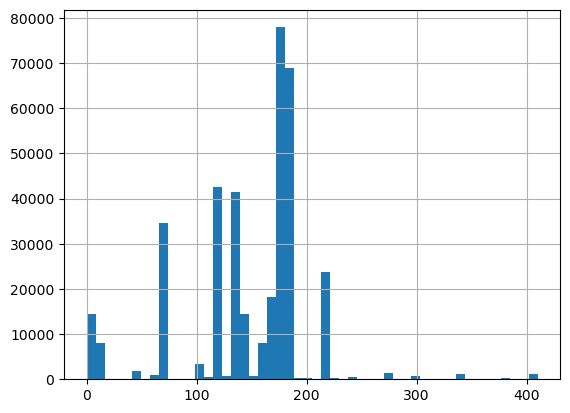

In [20]:
#plot the histogram of the nr_assentos_ofertados
flights.nr_assentos_ofertados.hist(bins=50)

In [33]:
#do the average of the nr_assentos_ofertados
print(f'mean {flights.nr_assentos_ofertados.mean()}')

#do the median of the nr_assentos_ofertados
print(f'median {flights.nr_assentos_ofertados.median()}')

mean 146.8979808135052
median 168.0


In [34]:
flights.ds_modelo.unique()

array(['AEROSPATIALE/ALENIA ATR 42-500', 'BOEING 737-400',
       'BOEING 737-300', 'CESSNA 208 CARAVAN',
       'AEROSPATIALE/ALENIA ATR 72 201/202', 'BOEING 727-200',
       'AEROSPATIALE/ALENIA ATR 42-300 / 320', 'BOEING 737-800',
       'BOEING 737-700', 'AIRBUS A321-100/200', 'AIRBUS A319',
       'AIRBUS A320-100/200', 'BOEING 767-300', 'AIRBUS A350-900',
       'BOEING 777-300ER PAX', 'EMBRAER 195/ERJ-190-200',
       'AIRBUS A330-200', 'EMBRAER E195-E2/ERJ-190-400',
       'EMBRAER 190/ERJ-190-100', 'AIRBUS A330-900NEO', 'AIRBUS A321NEO',
       'BOEING 737 MAX 8'], dtype=object)

In [35]:
flights.columns.tolist()

['id_basica',
 'id_empresa',
 'nr_voo',
 'nr_singular',
 'id_di',
 'cd_di',
 'ds_di',
 'ds_grupo_di',
 'dt_referencia',
 'nr_semana_referencia',
 'id_tipo_linha',
 'ds_natureza_etapa',
 'hr_partida_real',
 'dt_partida_real',
 'nr_semana_partida_real',
 'id_aerodromo_origem',
 'nr_etapa',
 'hr_chegada_real',
 'dt_chegada_real',
 'nr_semana_chegada_real',
 'id_equipamento',
 'ds_modelo',
 'ds_matricula',
 'id_aerodromo_destino',
 'lt_combustivel',
 'nr_assentos_ofertados',
 'kg_payload',
 'km_distancia',
 'nr_passag_pagos',
 'nr_passag_gratis',
 'kg_bagagem_livre',
 'kg_bagagem_excesso',
 'kg_carga_paga',
 'kg_carga_gratis',
 'kg_correio',
 'nr_decolagem',
 'nr_horas_voadas',
 'kg_peso',
 'nr_velocidade_media',
 'nr_pax_gratis_km',
 'nr_carga_paga_km',
 'nr_carga_gratis_km',
 'nr_correio_km',
 'nr_bagagem_paga_km',
 'nr_bagagem_gratis_km',
 'nr_ask',
 'nr_rpk',
 'nr_atk',
 'nr_rtk',
 'nr_linha',
 'dt_sistema']

### some plots

<Axes: >

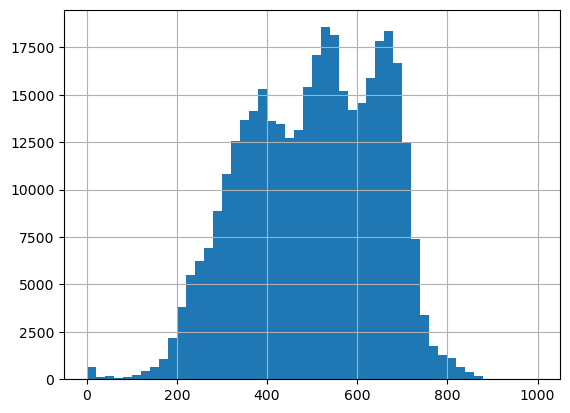

In [40]:
#plot the histogram of the nr_velocidade_media in a x range beteen 0 and 1000
flights.nr_velocidade_media.hist(bins=50, range=(0,1000))

<Axes: >

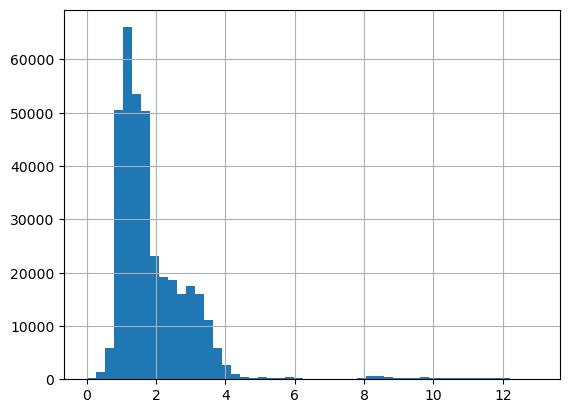

In [59]:
flights.nr_horas_voadas.hist(bins=50, range=(0,13))

<Axes: >

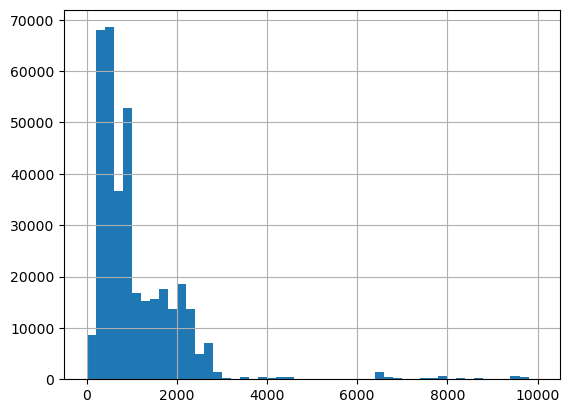

In [67]:
flights.km_distancia.hist(bins=50, range=(0,10000))

<Axes: >

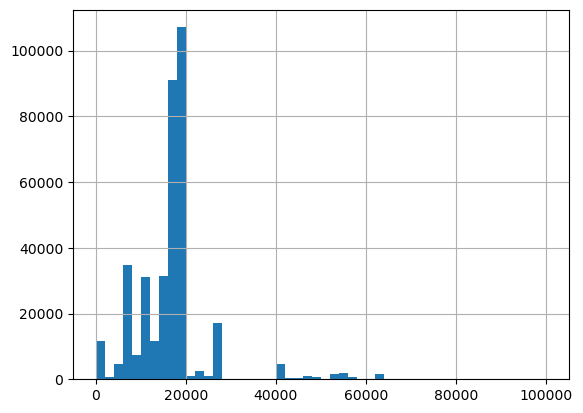

In [68]:
flights.kg_payload.hist(bins=50, range=(0,100000))

<Axes: >

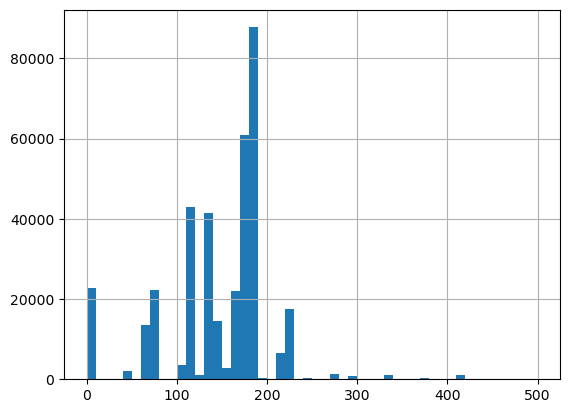

In [69]:
flights.nr_assentos_ofertados.hist(bins=50, range=(0,500))

<Axes: >

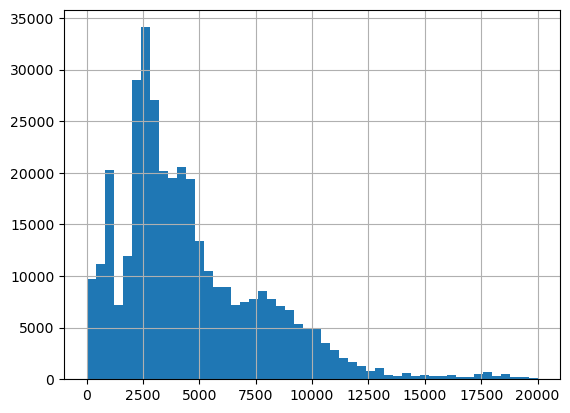

In [76]:
flights.lt_combustivel.hist(bins=50, range=(0,20000))

In [77]:
flights.ds_natureza_etapa.value_counts(sort=True)

ds_natureza_etapa
DOMÉSTICA        350191
INTERNACIONAL     16838
Name: count, dtype: int64

#### removing unuseful-incomplete columns

In [80]:
flights.drop(['dt_sistema','nr_ask','nr_rpk','nr_atk','nr_rtk','nr_pax_gratis_km','nr_carga_paga_km','nr_carga_gratis_km',
              'nr_correio_km','nr_bagagem_paga_km','nr_bagagem_gratis_km','kg_peso','nr_decolagem','kg_correio',
              'kg_carga_paga','kg_carga_gratis','kg_bagagem_livre','kg_bagagem_excesso','nr_passag_pagos','nr_passag_gratis', 
              'nr_etapa','dt_referencia','nr_semana_referencia', 'id_di','cd_di','ds_di','ds_grupo_di','nr_singular','nr_voo'],axis=1, inplace=True)

In [81]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367029 entries, 0 to 367028
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id_basica               367029 non-null  int64  
 1   id_empresa              367029 non-null  int64  
 2   id_tipo_linha           367029 non-null  int64  
 3   ds_natureza_etapa       367029 non-null  object 
 4   hr_partida_real         367029 non-null  object 
 5   dt_partida_real         367029 non-null  object 
 6   nr_semana_partida_real  367029 non-null  float64
 7   id_aerodromo_origem     367029 non-null  int64  
 8   hr_chegada_real         367029 non-null  object 
 9   dt_chegada_real         367029 non-null  object 
 10  nr_semana_chegada_real  367029 non-null  float64
 11  id_equipamento          367029 non-null  int64  
 12  ds_modelo               367029 non-null  object 
 13  ds_matricula            367029 non-null  object 
 14  id_aerodromo_destino

In [195]:
flights.nr_velocidade_media.value_counts(sort=True)

nr_velocidade_media
365.63    831
391.75    758
371.83    725
378.24    708
359.64    706
         ... 
776.97      1
364.28      1
553.14      1
817.78      1
408.26      1
Name: count, Length: 21783, dtype: int64

## Origin Analysis

In [82]:
orig.head()

,id_aerodromo_origem,sg_icao_origem,sg_iata_origem,nm_aerodromo_origem,nm_municipio_origem,nm_pais_origem,nm_continente_origem
0,1,OMAA,AUH,AB DHABI INTERNATIONAL,AB DHABI INTERNATIONAL,EMIRADOS ÁRABES UNIDOS,ÁSIA
1,4,MMAA,ACA,GENERAL JUAN N. ÁLVAREZ INTERNATIONAL AIRPORT,ACAPULCO/GEN.JUAN ALVAREZ,MÉXICO,AMÉRICA DO NORTE
2,10,SWHP,GGB,OLHOS D´ÁGUA,ÁGUA BOA,BRASIL,AMÉRICA DO SUL
3,16,SBMD,MEU,MONTE DOURADO,ALMEIRIM,BRASIL,AMÉRICA DO SUL
4,17,SNYA,GGF,ALMEIRIM,ALMEIRIM,BRASIL,AMÉRICA DO SUL


nothing to do here

## Destination Analysis

In [83]:
dest.head()

,id_aerodromo_destino,sg_icao_destino,sg_iata_destino,nm_aerodromo_destino,nm_municipio_destino,nm_pais_destino,nm_continente_destino
0,162,SBKP,VCP,VIRACOPOS,CAMPINAS,BRASIL,AMÉRICA DO SUL
1,275,EDDF,FRA,FRANKFURT INTERNATIONAL AIRPORT,FRANKFURT AM MAIN,ALEMANHA,EUROPA
2,467,KMIA,MIA,MIAMI INTERNATIONAL AIRPORT,"MIAMI, FLORIDA",ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE
3,626,SBGL,GIG,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,RIO DE JANEIRO,BRASIL,AMÉRICA DO SUL
4,500,KJFK,JFK,JOHN F. KENNEDY INTERNATIONAL AIRPORT,"NEW YORK, NEW YORK",ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE


In [84]:
dest[dest['id_aerodromo_destino'] == 162]['sg_iata_destino']

0    VCP
Name: sg_iata_destino, dtype: object

In [85]:
orig[orig['id_aerodromo_origem'] == 162]['sg_iata_origem']

42    VCP
Name: sg_iata_origem, dtype: object

## Airports table creation

now that I think about it, it doesn't make sense to have different tables for origin and destinations, as in the Flights table we can identify it by the iata code. for this reason, I'm going to merge these tables (through an outer join) in just one, called airports.

In [158]:

merged = pd.DataFrame()
merged = orig.merge(dest, left_on='id_aerodromo_origem', right_on='id_aerodromo_destino', how='outer')

# Create a new column 'id_aerodromo' that combines the values from both columns
merged['id_aerodromo'] = merged['id_aerodromo_origem'].combine_first(merged['id_aerodromo_destino'])
# Get the column names
columns = set(orig.columns).intersection(set(dest.columns))

# For each column name
for col in columns:
    # Create a new column in merged that combines the values from the corresponding columns in orig and dest
    merged[col] = merged[col + '_origem'].combine_first(merged[col + '_destino'])
    
    # Drop the original columns
    merged = merged.drop(columns=[col + '_origem', col + '_destino'])

In [164]:
# Rename the columns in orig and dest
orig.columns = [col.replace('_origem', '') for col in orig.columns]
dest.columns = [col.replace('_destino', '') for col in dest.columns]

merged = pd.merge(orig, dest, how='outer')

let's check if it works (i know that id_aerodromo 5 is just in one of the two tables)

In [165]:
merged[merged['id_aerodromo'] == 5]

,id_aerodromo,sg_icao,sg_iata,nm_aerodromo,nm_municipio,nm_pais,nm_continente
249,5,DGAA,ACC,KOTOKA INTERNATIONAL AIRPORT,ACCRA,GANA,ÁFRICA


it looks right :)

let's just check that all the id_aerodromo are preserved:

In [169]:
check = orig['id_aerodromo'].unique().tolist()
check += dest['id_aerodromo'].unique().tolist()
#remove the duplicates from the list
check = set(check)
check == set(merged['id_aerodromo'].unique().tolist())

True

In [171]:
check == set(flights['id_aerodromo_origem'].unique().tolist() + flights['id_aerodromo_destino'].unique().tolist())

True

done!

## Line Analysis

In [172]:
line.head()

,id_tipo_linha,cd_tipo_linha,ds_tipo_linha,ds_natureza_tipo_linha,ds_servico_tipo_linha
0,1,N,DOMÉSTICA MISTA,DOMÉSTICA,PASSAGEIRO
1,2,C,DOMÉSTICA CARGUEIRA,DOMÉSTICA,CARGUEIRO
2,3,I,INTERNACIONAL MISTA,INTERNACIONAL,PASSAGEIRO
3,4,G,INTERNACIONAL CARGUEIRA,INTERNACIONAL,CARGUEIRO


nothing to do here

## Company Analysis

In [173]:
company.head()

,id_empresa,sg_empresa_icao,sg_empresa_iata,nm_empresa,ds_tipo_empresa
0,1000004,MWM,WD,MODERN TRANSPORTE AÉREO DE CARGA S.A.,TRANSPORTE AÉREO REGULAR
1,1000078,CNT,6C,CONNECT LINHAS AÉREAS S.A. (ANTIGA CONNECT TÁX...,TRANSPORTE AÉREO NÃO REGULAR
2,1000641,LTG,M3,ABSA - AEROLINHAS BRASILEIRAS S.A.,TRANSPORTE AÉREO REGULAR
3,1000687,OWT,2F,TWO TÁXI AÉREO LTDA.,"AEROLEVANTAMENTO, AEROPUBLICIDADE, LIGAÇÃO AÉR..."
4,1000711,OMI,O1,OMNI TÁXI AÉREO S.A.,"AEROFOTOGRAFIA, AEROINSPEÇÃO, SERVIÇOS AÉREOS ..."


In [181]:
company.sg_empresa_iata.unique()

array(['WD', '6C', 'M3', '2F', 'O1', 'L1', '0S', 'G3', '0A', 'AD', '7M',
       'JJ', '2Z'], dtype=object)

In [174]:
company.ds_tipo_empresa.value_counts(sort=True)

ds_tipo_empresa
TRANSPORTE AÉREO REGULAR                                                                                      8
TRANSPORTE AÉREO NÃO REGULAR                                                                                  1
AEROLEVANTAMENTO, AEROPUBLICIDADE, LIGAÇÃO AÉREA SISTEMÁTICA REGULAR, TÁXI-AÉREO, TRANSPORTE AÉREO REGULAR    1
AEROFOTOGRAFIA, AEROINSPEÇÃO, SERVIÇOS AÉREOS PÚBLICOS, TÁXI-AÉREO, TRANSPORTE AÉREO NÃO REGULAR              1
TRANSPORTE AÉREO NÃO REGULAR, TRANSPORTE AÉREO REGULAR                                                        1
SERVIÇOS AÉREOS PÚBLICOS, TRANSPORTE AÉREO REGULAR                                                            1
Name: count, dtype: int64

ok, nothing to say here

## Equipement Analysis

In [178]:
equip.head(50)

,id_equipamento,sg_equipamento_icao,ds_modelo
0,14,A319,AIRBUS A319
1,15,A320,AIRBUS A320-100/200
2,16,A321,AIRBUS A321-100/200
3,19,A332,AIRBUS A330-200
4,26,A359,AIRBUS A350-900
5,65,AT43,AEROSPATIALE/ALENIA ATR 42-300 / 320
6,67,AT45,AEROSPATIALE/ALENIA ATR 42-500
7,69,AT72,AEROSPATIALE/ALENIA ATR 72 201/202
8,93,B722,BOEING 727-200
9,96,B733,BOEING 737-300


In [ ]:
equip.sg

In [176]:
equip.sg_equipamento_icao.value_counts(sort=True)

sg_equipamento_icao
A319    1
A320    1
A339    1
A21N    1
B38M    1
E195    1
E190    1
C208    1
B77W    1
B763    1
B738    1
B737    1
B734    1
B733    1
B722    1
AT72    1
AT45    1
AT43    1
A359    1
A332    1
A321    1
E295    1
Name: count, dtype: int64

perfect, nothing to say here too. Now I'm going to save the modified versions of flights and Airports

## Save Data

In [177]:
# save the data
merged.to_csv('dataset/final_data/airports.csv', index=False)
flights.to_csv('dataset/final_data/flights.csv', index=False)

> remember that the line, company and destination table are correct (the ones in the folder processed_data)